In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

In [7]:
""" Jupyter notebook in same directory as .h5 file """
def descend_obj(obj,sep='\t'):
    """
    Iterate through groups in a HDF5 file and prints the groups and datasets names and datasets attributes
    """
    if type(obj) in [h5py._hl.group.Group,h5py._hl.files.File]:
        for key in obj.keys():
            print(sep,'-',key,':',obj[key])
            descend_obj(obj[key],sep=sep+'\t')
    elif type(obj)==h5py._hl.dataset.Dataset:
        for key in obj.attrs.keys():
            print(sep+'\t','-',key,':',obj.attrs[key])

def h5dump(path,group='/'):
    """
    print HDF5 file metadata

    group: you can give a specific group, defaults to the root group
    """
    with h5py.File(path,'r') as f:
         descend_obj(f[group])
            
def buildline(i=int):
    p = plt.plot(values[:i]) #note it only returns the dataset, up to the point i
    plt.ylim(0,100)
    plt.xlabel('Steps')
    plt.ylabel('Height')

In [8]:
h5_file_name = '/expansion1/starthack/MAMMUT-STARTHACK21/data/overhang/bae8f52c-407e-5f89-a8e3-61fcca51ee0a.h5'
f = h5py.File(h5_file_name, 'r')
h5dump(h5_file_name)

	 - climbs : <HDF5 group "/climbs" (2 members)>
		 - 0 : <HDF5 group "/climbs/0" (3 members)>
			 - height_profile : <HDF5 dataset "height_profile": shape (2468,), type "<f8">
			 - moves_LH : <HDF5 dataset "moves_LH": shape (26,), type "|V32">
			 - moves_RH : <HDF5 dataset "moves_RH": shape (31,), type "|V32">
		 - all : <HDF5 dataset "all": shape (1,), type "|V193">
	 - meta : <HDF5 group "/meta" (0 members)>
	 - summary : <HDF5 group "/summary" (0 members)>


{'whiskers': [<matplotlib.lines.Line2D at 0x7f556f750c70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f556f69c370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f556f750910>],
 'medians': [<matplotlib.lines.Line2D at 0x7f556f69ca30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f556f69cd90>],
 'means': []}

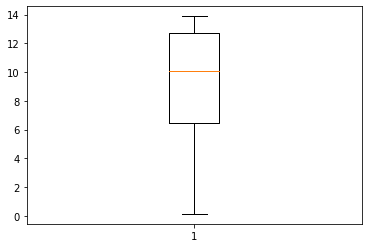

In [9]:
plt.boxplot(list(f['climbs/0/height_profile']))

In [10]:
height_profile = np.array(f['climbs/0/height_profile'])

In [11]:
steps = np.arange(0, len(height_profile), 10)

In [12]:
values = [height_profile[int(i)] for i in steps]

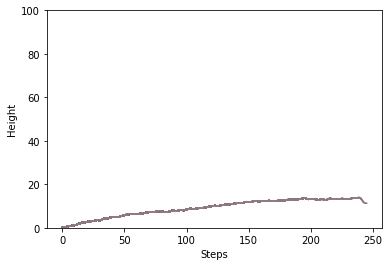

In [13]:
fig = plt.figure()
animator = ani.FuncAnimation(fig, buildline, interval = 10, frames=len(values))
animator.save('myfirstAnimation.gif', savefig_kwargs={'transparent': True, 'facecolor': 'none'})
plt.show()

In [11]:
def buildmebarchart(i=int):
    p = plt.bar(height_profile[:i]) #note it only returns the dataset, up to the point i
    plt.xlabel('Steps')
    plt.ylabel('Height')

fig = plt.figure()
animator = ani.FuncAnimation(fig, buildmebarchart, interval =1, frames=2000)
animator.save('myfirstBar.gif', savefig_kwargs={'transparent': True, 'facecolor': 'none'})
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


IndexError: list index out of range

<Figure size 432x288 with 0 Axes>